In [1]:
%matplotlib inline

import underworld as uw
import math
from underworld import function as fn
import glucifer.pylab as plt

In [2]:
linearMesh = uw.mesh.FeMesh_Cartesian('Q2/dQ1', (32,23), (0.,0.), (1.,1.))

0:2 --
['Q2']
/DQ1
D+ --
['Q2', 'DQ1']
/
/
/
/
['Q2', 'DQ1']
/DQ1
/
/
/
/


In [3]:
constantMesh = linearMesh.subMesh

In [4]:
velocityField = uw.mesh.MeshVariable(linearMesh,2)
velocityField.data[:] = (0.,0.)

In [5]:
pressureField = uw.mesh.MeshVariable(constantMesh,1)
pressureField.data[:] = 0.

In [6]:
# setup freeslip
IWalls = linearMesh.specialSets["MinI_VertexSet"] + linearMesh.specialSets["MaxI_VertexSet"]
JWalls = linearMesh.specialSets["MinJ_VertexSet"] + linearMesh.specialSets["MaxJ_VertexSet"]
freeslip = uw.conditions.DirichletCondition(velocityField, (IWalls, JWalls))

In [7]:
# setup analytic functions
#solA = fn.analytic.SolCx()
# solA = fn.analytic.SolKx()
#solA = fn.analytic.SolKx(1.0, 5.73, 2, 0.7)
solA = fn.analytic.SolM(1.0,3,1,2.0)

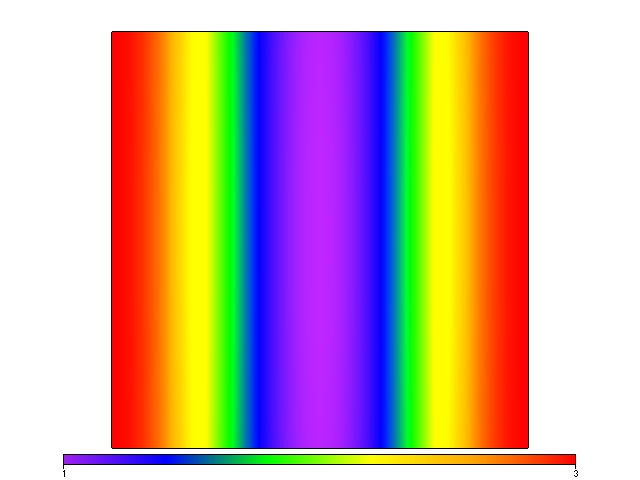

In [8]:
# get eta function from solA and take a look
eta = plt.Figure()
eta.Surface(solA.viscosityFn,linearMesh)
eta.show()

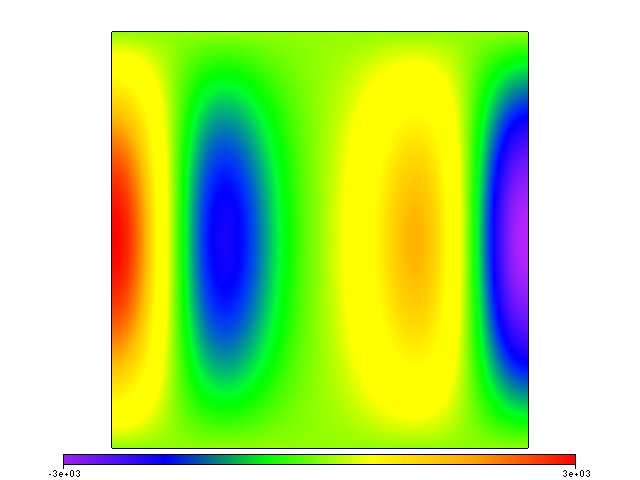

In [9]:
# grab the body force from SolA and take a look at vertical component
force = plt.Figure()
force.Surface(solA.bodyForceFn[1], linearMesh)
force.show()

In [10]:
solA.bodyForceFn[1].evaluate((1.0,0.75))


array([[-2145.7020532]])

In [11]:
# setup our stokes guy
stokesSystem = uw.systems.Stokes(velocityField,pressureField,solA.viscosityFn,solA.bodyForceFn,conditions=[freeslip,], rtolerance=1.e-5)

In [12]:
# lets solve
stokesSystem.solve()

In [14]:
errMesh=uw.mesh.FeMesh_Cartesian('Q1', (256,256), (0.,0.), (1.,1.))

Q1




['Q1']
Q1






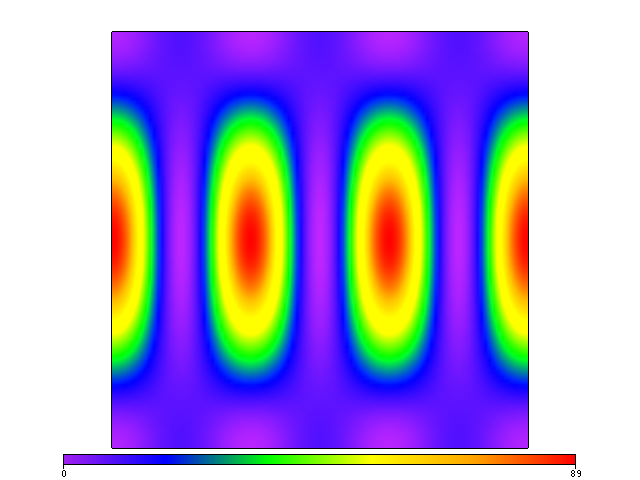

In [15]:
# lets check FEM solution
velMag = plt.Figure()
velMag.Surface(fn.math.dot(velocityField,velocityField), linearMesh)
velMag.show()

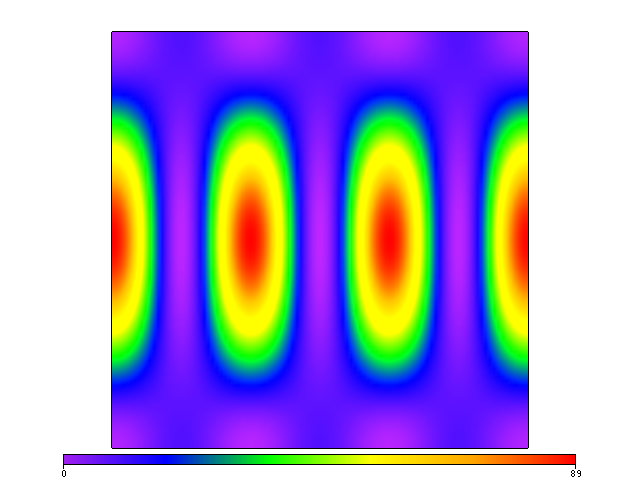

In [16]:
# and analytic
velMagA = plt.Figure()
velMagA.Surface(fn.math.dot(solA.velocityFn,solA.velocityFn), linearMesh)
velMagA.show()

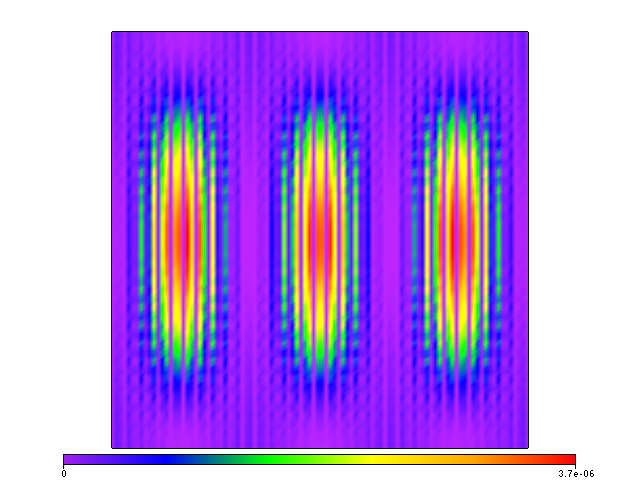

In [17]:
# and difference
velDiff = plt.Figure()
velDiff.Surface(fn.math.dot(solA.velocityFn - velocityField,solA.velocityFn - velocityField), errMesh)
velDiff.show()

In [18]:
# rms
squared = uw.utils.Integral(fn.math.dot(solA.velocityFn-velocityField,solA.velocityFn-velocityField), linearMesh)
area = uw.utils.Integral(1.,linearMesh)
math.sqrt(squared.integrate()[0]/area.integrate()[0])

0.0006123601757341509

In [19]:
import numpy as np
N=201
a=np.ndarray(shape=(N,2))
a[:,1]=0.5*np.ones(N)
a[:,0]=np.linspace(0,1,N)

In [20]:
import matplotlib.pyplot as mplt
import matplotlib.pylab as pylab

In [21]:
vy=solA.velocityFn[1].evaluate(a)[:,0]
ax=a[:,0]

In [22]:
ax.shape

(201,)

In [23]:
vy.shape

(201,)

In [24]:
vf=velocityField[1].evaluate(a)[:,0]

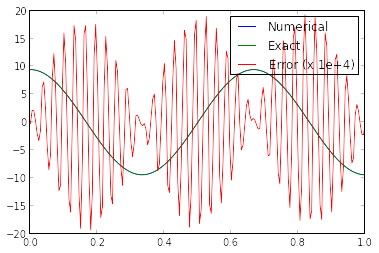

In [25]:
mplt.plot(ax,vf,label='Numerical')
mplt.plot(ax,vy,label='Exact')
mplt.plot(ax,10000*(vy-vf),label='Error (x 1e+4)')
mplt.legend()

In [93]:
vf=velocityField[1].evaluate(a)[:,0]

In [94]:
vf.shape

In [95]:
vy.shape

In [96]:
ax.shape

In [97]:
velx = plt.Figure()
velx.Surface(solA.velocityFn[0], linearMesh)
velx.show()

In [98]:
velz = plt.Figure()
velz.Surface(solA.velocityFn[1], linearMesh)
velz.show()